In [134]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
from ydata_profiling import ProfileReport as ydata_prof

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ValueError)

In [135]:
df = pd.read_csv("panera_no_iri_pre_eda.csv", parse_dates=['DATE'])

In [136]:
min_date = df['DATE'].min()
max_date = df['DATE'].max()
print(f"Min Date: {min_date} and Max Date: {max_date}")

Min Date: 2020-07-05 00:00:00 and Max Date: 2023-09-03 00:00:00


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE                   88 non-null     datetime64[ns]
 1   atl_spend              52 non-null     float64       
 2   atl_impressions        52 non-null     float64       
 3   instacart_spend        79 non-null     float64       
 4   instacart_impressions  79 non-null     float64       
 5   kroger_spend           22 non-null     float64       
 6   kroger_impressions     22 non-null     float64       
 7   walmart_spend          42 non-null     float64       
 8   walmart_impressions    42 non-null     float64       
 9   impressions            88 non-null     int64         
 10  revenue                79 non-null     float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 7.7 KB


In [138]:
print('Missing Values')
print(df.isnull().sum() / len(df) * 100)

Missing Values
DATE                      0.000000
atl_spend                40.909091
atl_impressions          40.909091
instacart_spend          10.227273
instacart_impressions    10.227273
kroger_spend             75.000000
kroger_impressions       75.000000
walmart_spend            52.272727
walmart_impressions      52.272727
impressions               0.000000
revenue                  10.227273
dtype: float64


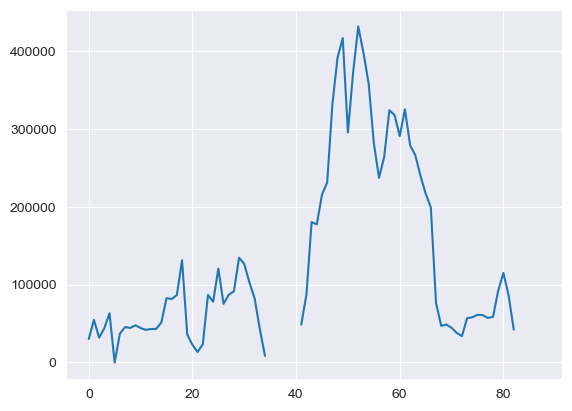

In [139]:
df_plot = df.set_index('DATE')
plt.plot(df.index, df['revenue'])

Our primary problem here is that revenue, the dependent variable, is missing values.
Let's check if we can drop the last few rows and still have a complete dataset.

In [140]:
df.tail(10)

,DATE,atl_spend,atl_impressions,instacart_spend,instacart_impressions,kroger_spend,kroger_impressions,walmart_spend,walmart_impressions,impressions,revenue
78,2023-06-18,16278.133900,10347591.0,5189.060002,186036.0,NaN,NaN,7536.46,1777873.0,12311500,58542.190950
79,2023-06-25,16713.423050,9364871.0,6629.504000,220953.0,NaN,NaN,11998.74,2566501.0,12152325,92215.241750
80,2023-07-02,7783.979998,986204.0,11184.219000,369084.0,NaN,NaN,17322.79,3625367.0,4980655,114920.572200
81,2023-07-09,7554.579998,897358.0,12340.299000,447148.0,NaN,NaN,10060.15,2129264.0,3473770,86563.144420
82,2023-07-16,6904.949997,937153.0,7363.036000,273377.0,NaN,NaN,5961.80,1279305.0,2489835,42120.204440
83,2023-07-23,6689.199998,771787.0,NaN,NaN,NaN,NaN,NaN,NaN,771787,NaN
84,2023-07-30,6147.609997,807313.0,NaN,NaN,NaN,NaN,NaN,NaN,807313,NaN
85,2023-08-06,5831.689995,615750.0,NaN,NaN,NaN,NaN,NaN,NaN,615750,NaN
86,2023-08-13,3898.330000,404878.0,NaN,NaN,NaN,NaN,NaN,NaN,404878,NaN
87,2023-09-03,NaN,NaN,207.105000,13807.0,NaN,NaN,NaN,NaN,13807,4538.397709


In [141]:
df = df[:-5]

The missings in the middle of the dataset are a problem, but we can't drop them. We also
do not have enough data to use MICE or a similar imputation method. We will have to suffice
with filling the missings with the previous value.

In [142]:
df["revenue"].ffill( inplace=True)

In [143]:
df.fillna(0, inplace=True)
print((df == 0).sum() / len(df))

DATE                     0.000000
atl_spend                0.445783
atl_impressions          0.433735
instacart_spend          0.084337
instacart_impressions    0.072289
kroger_spend             0.759036
kroger_impressions       0.759036
walmart_spend            0.493976
walmart_impressions      0.493976
impressions              0.012048
revenue                  0.036145
dtype: float64


Including zeroes and NAs, this dataset is missing most of the information.

Every column has a very significant number of zeroes.

In [144]:
df_spend = df[['atl_spend', 'instacart_spend', 'kroger_spend', 'walmart_spend', 'impressions', 'revenue']]

Let's see if there is any useful correlation between spend and revenue.

Looking for sufficient variance here. With units, they tend to have less variance.
We can verify variance with the KDE plots overlaying the histograms.

In [145]:
df.describe()

,DATE,atl_spend,atl_impressions,instacart_spend,instacart_impressions,kroger_spend,kroger_impressions,walmart_spend,walmart_impressions,impressions,revenue
count,83,83.000000,8.300000e+01,83.000000,8.300000e+01,83.000000,8.300000e+01,83.000000,8.300000e+01,8.300000e+01,83.000000
mean,2022-04-18 16:28:54.939759104,27270.514699,5.690617e+06,9775.677555,7.915934e+05,2747.666386,1.471504e+05,5345.448315,1.326318e+06,7.955679e+06,124316.290394
min,2020-07-05 00:00:00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,2020-12-23 12:00:00,0.000000,0.000000e+00,4066.898000,2.067245e+05,0.000000,0.000000e+00,0.000000,0.000000e+00,7.481405e+05,43056.945000
50%,2022-10-02 00:00:00,6904.949997,8.973580e+05,8801.690000,4.471480e+05,0.000000,0.000000e+00,146.400001,1.297220e+05,3.259029e+06,76402.493410
75%,2023-02-22 12:00:00,31136.824390,8.469360e+06,12352.494500,9.883625e+05,0.000000,0.000000e+00,9490.304993,2.298685e+06,1.242283e+07,207273.649000
max,2023-07-16 00:00:00,197107.994500,3.037774e+07,29726.577010,3.714458e+06,20748.080000,1.252769e+06,24535.060000,7.124030e+06,3.442233e+07,431322.454700
std,NaN,47173.201833,8.126345e+06,7253.835058,8.677841e+05,5570.394073,3.184785e+05,7368.477890,1.944872e+06,8.890311e+06,118822.333281


<Axes: xlabel='revenue', ylabel='Count'>

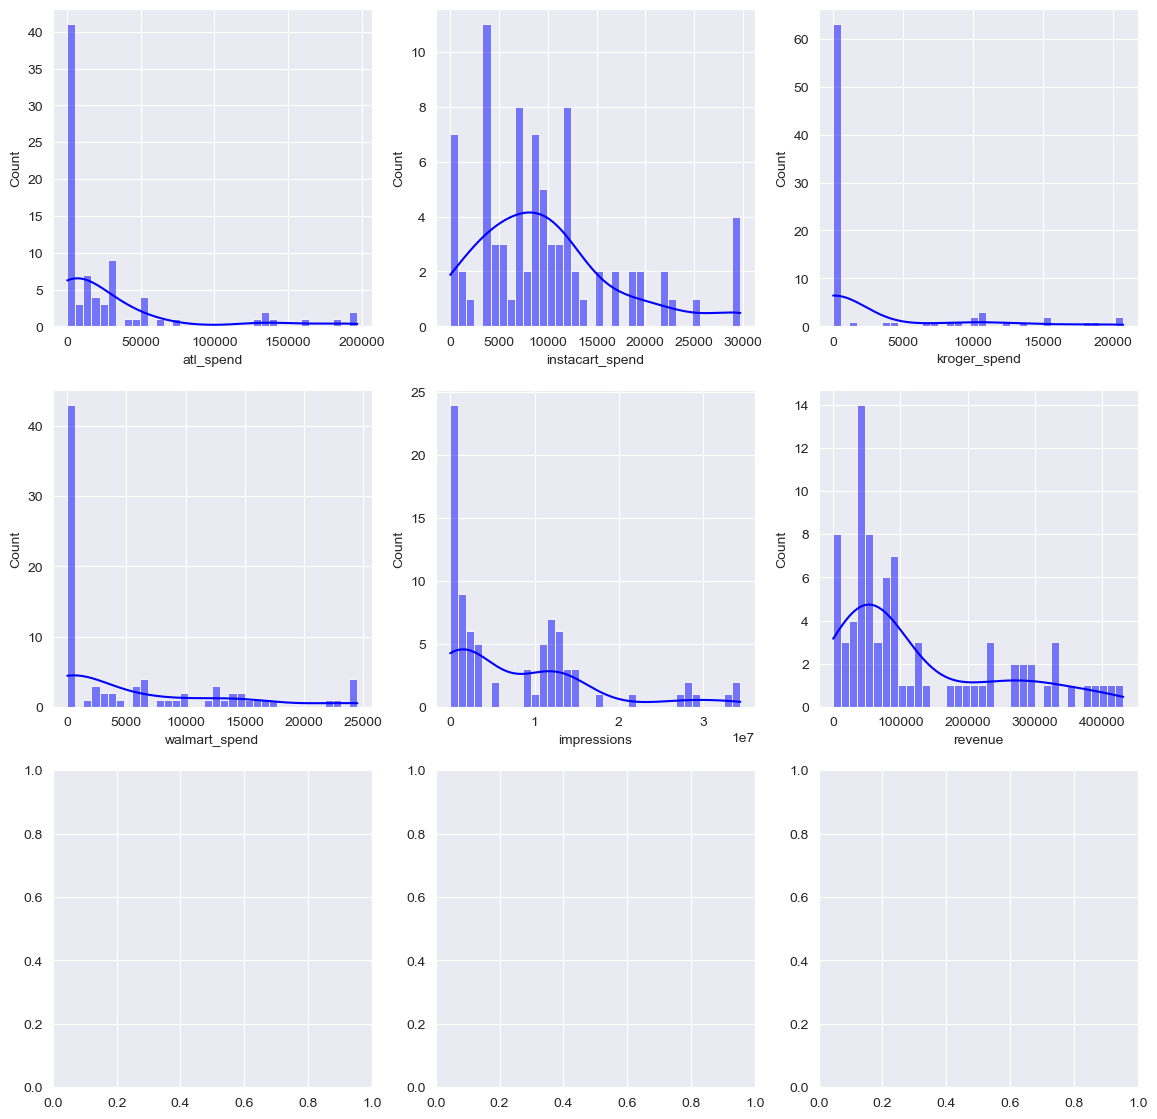

In [146]:
fig, axes = plt.subplots(3, 3, figsize=(14, 14))
sns.histplot(df_spend['atl_spend'], stat='count', kde=True, bins=int(180/5), ax=axes[0, 0], color = 'blue')
sns.histplot(df_spend['instacart_spend'], kde=True, bins=int(180/5), ax=axes[0, 1], color = 'blue')
sns.histplot(df_spend['kroger_spend'], kde=True, bins=int(180/5), ax=axes[0, 2], color = 'blue')
sns.histplot(df_spend['walmart_spend'], stat='count', kde=True, bins=int(180/5), ax=axes[1, 0], color = 'blue')
sns.histplot(df_spend['impressions'], kde=True, bins=int(180/5), ax=axes[1, 1], color = 'blue')
sns.histplot(df_spend['revenue'], kde=True, bins=int(180/5), ax=axes[1, 2], color = 'blue')

The distribution of the spend variables is terribly, with the only decent being instacart.

<Axes: >

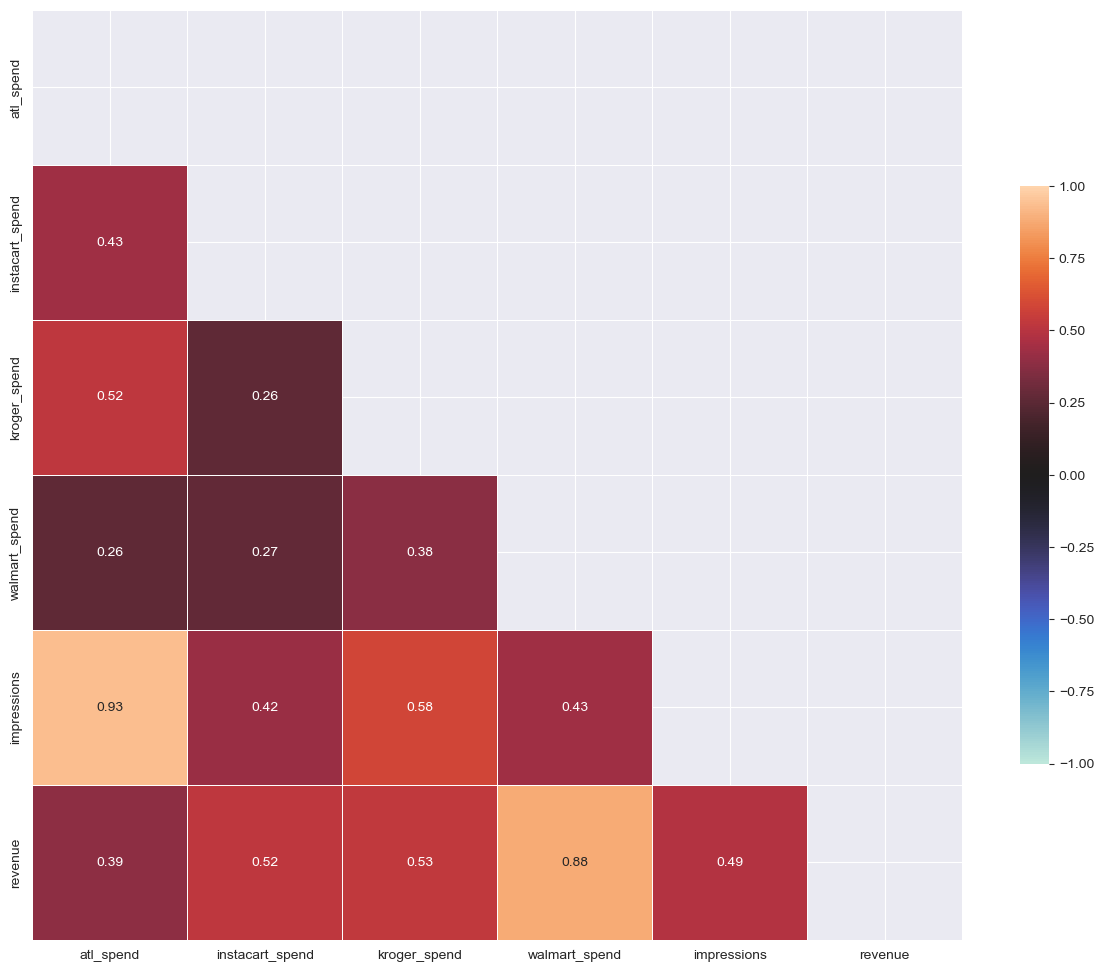

In [147]:
corr = df_spend.corr(method="pearson").round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.color_palette('icefire', as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Correlations actually look solid, but that's probably just because zero correlates
well with zero

In [148]:
corr.describe()

,atl_spend,instacart_spend,kroger_spend,walmart_spend,impressions,revenue
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.588333,0.483333,0.545000,0.536667,0.641667,0.635000
std,0.304330,0.272225,0.252012,0.321289,0.257792,0.244356
min,0.260000,0.260000,0.260000,0.260000,0.420000,0.390000
25%,0.400000,0.307500,0.415000,0.297500,0.445000,0.497500
50%,0.475000,0.425000,0.525000,0.405000,0.535000,0.525000
75%,0.827500,0.497500,0.567500,0.767500,0.842500,0.792500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The standard deviations are not great for variance either.

This section checks for outliers and approximates some idea of how extreme they are.
However, in Robyn, its converge() function that runs within the robyn_run() model
automatically winsorizes (adjusts upper and lower bounds of data input). This is just
a diagnostic if the model output is abnormal.

In [149]:
lower_q = df.quantile(0.25)
upper_q = df.quantile(0.75)
iqr = upper_q - lower_q
lower_bound = lower_q - (1.5 * iqr)
upper_bound = upper_q + (1.5 * iqr)
outliers = df[(df < lower_bound) | (df > upper_bound)]
print("Percentage Outliers")
print(outliers.count()/len(df))

Percentage Outliers
DATE                     0.000000
atl_spend                0.096386
atl_impressions          0.096386
instacart_spend          0.060241
instacart_impressions    0.108434
kroger_spend             0.240964
kroger_impressions       0.240964
walmart_spend            0.048193
walmart_impressions      0.072289
impressions              0.036145
revenue                  0.000000
dtype: float64


There are a significant number of outliers here. There are now only 78 viable rows, with mostly
zeroes, terrible distributions and variance, and significant outliers. This is not a good dataset.

These two modules make html reports that are quite good and can supplement for an EDA if the EDA is not available.
In addition, I chose them because they do a good Time Series analysis and export it.

In [150]:
# profile_y_basic = ydata_prof(df, title="Initial EDA")
# profile_y_basic.to_file("basic_eda.html")
# profile_y_ts = ydata_prof(df, tsmode=True, sortby="DATE", title='Time Series EDA')
# profile_y_ts.to_file("time_series_eda.html")

In [151]:
# df.to_csv('.csv', index=False)